In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from datetime import date
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

### Data Cleansing & EDA

In [40]:
df=pd.read_excel('marketing_campaign.xlsx') 

In [41]:
pd.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [42]:
df.shape

(2240, 29)

#### Missing Values

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [44]:
pd.set_option('max_colwidth',100)
df_lack_only = df[df.isnull().values == True]
df_lack_only.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0


In [45]:
print('There is {} missing values'.format(len(df_lack_only)))
print('There is {}% missing values'.format(round(len(df_lack_only)/len(df)*100,2)))

There is 24 missing values
There is 1.07% missing values


In [46]:
df=df.dropna()

#### Duplicated Values

In [47]:
duplicate = df[df.duplicated()]
print('There is {} duplicated'.format(df.duplicated().sum()))
print('There is {}% duplicated'.format(round(df.duplicated().sum()/len(df['ID'])*100,2)))

There is 0 duplicated
There is 0.0% duplicated


#### Change the data type

In [48]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [49]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [50]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Feature Engineering

#### Add new features

In [51]:
df['Age'] = 2021 - df['Year_Birth']

In [52]:
df['Marital_Situation']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple',\
                                                      'Together':'In couple','Absurd':'Alone','Widow':'Alone',\
                                                      'YOLO':'Alone'})

In [53]:
df['Marital_Situation']=df['Marital_Situation'].replace({'Alone':0,'In couple':1})

In [54]:
df['Education']=df['Education'].replace({'Basic':1,'2n Cycle':2,'Graduation':3,'Master':4,'PhD':5})

In [55]:
df_new=df.drop(['Marital_Status','Year_Birth','ID'],axis=1)

In [56]:
df_new.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Marital_Situation
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000
mean,3.459838,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,52.179603,0.645307
std,1.004825,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,0.478528
min,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,25.000000,0.000000
25%,3.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,0.000000
50%,3.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,51.000000,1.000000
75%,4.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,62.000000,1.000000
max,5.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,128.000000,1.000000


#### Outliers

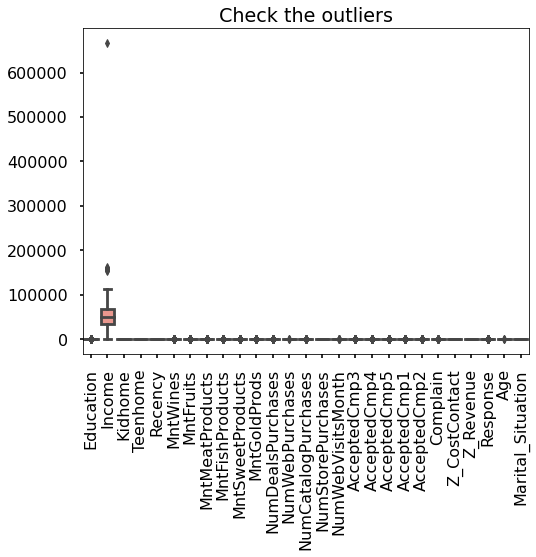

In [57]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=df_new,ax=ax)
plt.title('Check the outliers')
plt.xticks(rotation=90);

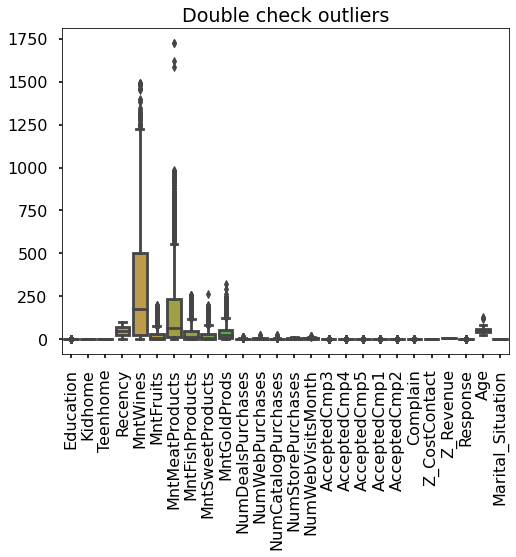

In [58]:
df_double=df_new.drop(['Income'],axis=1)
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(data=df_double,ax=ax)
plt.title('Double check outliers')
plt.xticks(rotation=90);

In [59]:
feat=['Income','MntMeatProducts','MntGoldProds','Age','MntWines','MntSweetProducts']

In [60]:
def standardization(df):
    df_std = df.copy(deep=True)
    for column in feat:
        df_std[column] = (df_std[column]-df_std[column].mean())/df_std[column].std()
    return df_std

In [61]:
df_std=standardization(df_new)

In [62]:
df_melted = pd.melt(frame=df_std,id_vars='Response',value_vars=feat,var_name='features',\
                        value_name='value',col_level=None)

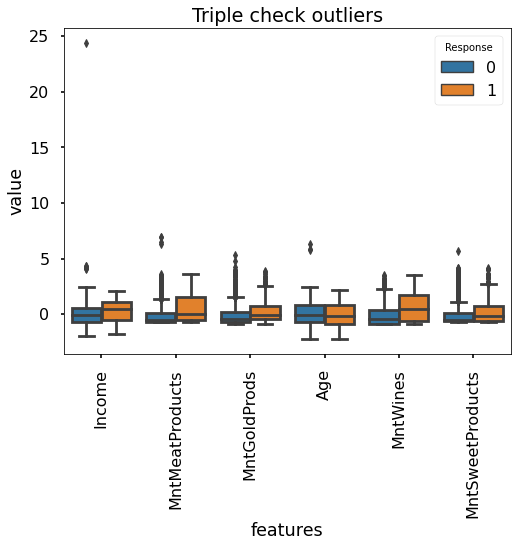

In [63]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='features', y='value', hue='Response',data=df_melted)
plt.title('Triple check outliers')
plt.xticks(rotation=90);

In [64]:
def filter_by_std(series,return_thresholds=False):
    mean,stdev=series.mean(),series.std()
    cutoff=2*stdev
    lower_bound, upper_bound = mean - cutoff, mean + cutoff
    if return_thresholds:
        return lower_bound, upper_bound
    else:
        return [True if i < lower_bound or i > upper_bound else False for i in series]

In [65]:
outliers=pd.DataFrame()

for features in feat:
    outliers = outliers.append(df_std[filter_by_std(df_std[features])])
    
outliers

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Marital_Situation
164,5,4.170954,0,1,2014-03-01,98,-0.845147,2,6.309004,1,-0.609390,-0.829198,15,0,22,0,0,0,0,0,0,0,0,3,11,0,-0.348720,1
252,3,2.003917,0,0,2013-04-05,5,-0.406405,148,1.235063,32,3.529679,2.007795,1,6,9,13,2,0,1,1,1,1,0,3,11,1,-0.432154,0
617,5,4.375697,1,1,2013-06-03,31,-0.652456,1,-0.673238,2,-0.633737,-0.809899,0,0,0,1,1,0,0,0,0,0,0,3,11,0,-0.599021,1
646,3,2.114312,0,0,2013-01-21,36,2.086718,181,-0.280877,202,-0.146788,3.146453,0,9,8,13,3,0,0,1,1,0,0,3,11,1,-0.098419,1
655,3,4.039107,0,0,2014-02-07,81,-0.901472,1,-0.740117,1,-0.633737,-0.829198,0,0,0,0,0,0,0,0,0,0,0,3,11,0,-0.515588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,3,1.499727,0,0,2013-12-23,91,1.096584,144,-0.151576,94,4.016628,3.802628,1,4,8,5,1,1,0,1,1,0,0,3,11,0,-1.266492,1
2190,4,1.484473,0,0,2013-02-25,36,1.084726,47,2.175838,145,2.044483,-0.559008,1,7,5,12,2,0,0,0,0,0,0,3,11,1,-1.183058,0
2193,2,1.195712,0,0,2012-11-06,38,0.743812,54,3.022981,202,2.580128,0.367357,1,7,7,10,3,1,0,0,1,0,0,3,11,1,0.986220,1
2217,5,1.183199,0,0,2014-04-05,54,0.079769,194,0.936334,149,2.385348,0.251561,0,4,6,7,1,0,0,0,0,0,0,3,11,0,1.737124,0


In [66]:
print("There is {} outliers".format(outliers['Response'].count()))
print('There is {}% outliers'.format(round(len(outliers['Response'])/len(df_new['Response'])*100,2)))

There is 601 outliers
There is 27.12% outliers


Due to outliers so much by mean+-2std, so we decided  to manually delete data which Income >=200000,Age>=90,MntMeatProducts>=1500 based on the boxplot.

In [67]:
index_age = df[ df['Age'] >= 90].index 
print("There is {} Age outliers".format(len(index_age)))
print('There is {}% Age outliers'.format(round(len(index_age)/len(df_new['Response'])*100,2)))

There is 3 Age outliers
There is 0.14% Age outliers


In [68]:
index_income = df[ df['Income'] >= 200000].index 
print("There is {} Income outliers".format(len(index_income)))
print('There is {}% Income outliers'.format(round(len(index_income)/len(df_new['Response'])*100,2)))

There is 1 Income outliers
There is 0.05% Income outliers


In [69]:
index_MMP=df[df['MntMeatProducts'] >= 1500].index
print("There is {} MntMeatProducts outliers".format(len(index_MMP)))
print('There is {}% MntMeatProducts outliers'.format(round(len(index_MMP)/len(df_new['Response'])*100,2)))

There is 4 MntMeatProducts outliers
There is 0.18% MntMeatProducts outliers


In [70]:
df_new.drop(index_age, inplace = True) 

In [71]:
df_new.drop(index_income, inplace = True) 

In [72]:
df_new.drop(index_MMP, inplace = True) 

In [73]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2208 non-null   int64         
 1   Income               2208 non-null   float64       
 2   Kidhome              2208 non-null   int64         
 3   Teenhome             2208 non-null   int64         
 4   Dt_Customer          2208 non-null   datetime64[ns]
 5   Recency              2208 non-null   int64         
 6   MntWines             2208 non-null   int64         
 7   MntFruits            2208 non-null   int64         
 8   MntMeatProducts      2208 non-null   int64         
 9   MntFishProducts      2208 non-null   int64         
 10  MntSweetProducts     2208 non-null   int64         
 11  MntGoldProds         2208 non-null   int64         
 12  NumDealsPurchases    2208 non-null   int64         
 13  NumWebPurchases      2208 non-nul

#### Correlation

Text(0.5, 1.0, 'Correlation each variables')

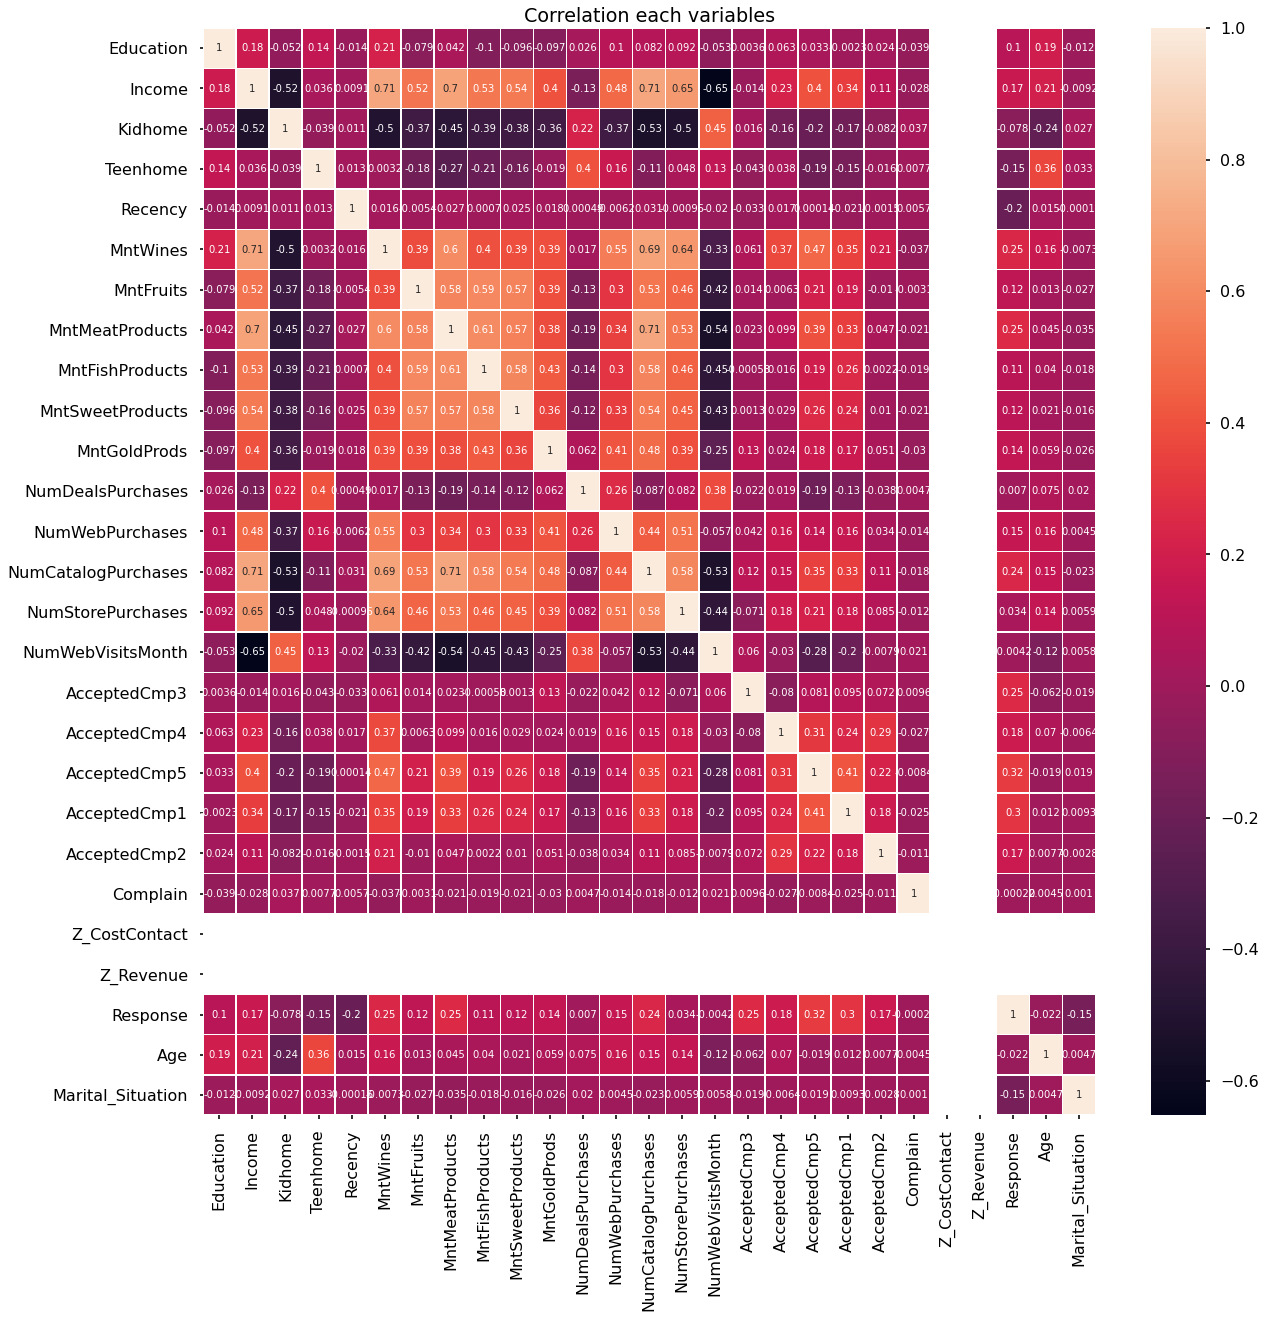

In [74]:
corr = df_new.corr()
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=0.5, ax =ax)
plt.title("Correlation each variables")

In [75]:
df_model=df_new.drop(['Dt_Customer','Z_CostContact','Z_Revenue'],axis=1)

Due to the result of correlation map, we decieded to drop Z_costContact and Z_revenue. These two have no correlation with other variables.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV,RepeatedStratifiedKFold

#### Check Balance

Text(0.5, 1.0, 'Check the balance')

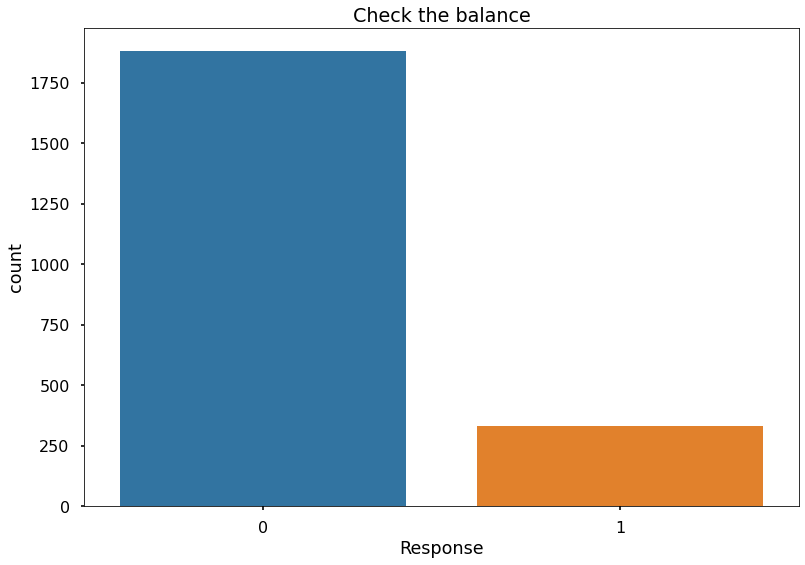

In [77]:
sns.countplot(x='Response',data=df)
plt.title('Check the balance')

In [78]:
X=df_model.drop(['Response'],axis=1)
y=df_model['Response']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['features']=X.columns
vif=vif.sort_values('VIF Factor', ascending=False)
print(vif)

    VIF Factor             features
1    25.990067               Income
22   20.134855                  Age
0    14.193382            Education
14    9.835465    NumStorePurchases
15    9.690693    NumWebVisitsMonth
12    6.510438      NumWebPurchases
13    6.351047  NumCatalogPurchases
5     6.338874             MntWines
7     4.931491      MntMeatProducts
11    4.365615    NumDealsPurchases
4     3.753613              Recency
8     3.220661      MntFishProducts
2     3.110031              Kidhome
3     3.087242             Teenhome
6     2.838660            MntFruits
9     2.824351     MntSweetProducts
23    2.766059    Marital_Situation
10    2.650841         MntGoldProds
18    1.763164         AcceptedCmp5
17    1.492146         AcceptedCmp4
19    1.438051         AcceptedCmp1
16    1.200018         AcceptedCmp3
20    1.171715         AcceptedCmp2
21    1.015807             Complain


In [80]:
def multicollinearity(df):
    vif_data = pd.DataFrame()
    vif_data['IndependVariables'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i)\
                       for i in range(len(df.columns))]
    vif_data = vif_data.sort_values('VIF', ascending = False)
    #print(vif_data)
    while vif_data['VIF'].iloc[0] > 10:
        maxName = vif_data.iloc[0]
        #print(maxName)
        #vif_data = vif_data.iloc[1:,:]
        df = df.drop([maxName.IndependVariables],axis = 1)
        vif_data = pd.DataFrame()
        vif_data['IndependVariables'] = df.columns
        vif_data['VIF'] = [variance_inflation_factor(df.values, i)\
                           for i in range(len(df.columns))]
        vif_data = vif_data.sort_values('VIF', ascending = False)
        print(vif_data)
    return df

In [81]:
X_new=multicollinearity(X)

      IndependVariables        VIF
21                  Age  17.805184
0             Education  12.800242
14    NumWebVisitsMonth   9.160434
13    NumStorePurchases   9.109767
11      NumWebPurchases   6.311804
12  NumCatalogPurchases   6.269130
4              MntWines   6.255270
6       MntMeatProducts   4.654669
10    NumDealsPurchases   4.260195
3               Recency   3.731114
7       MntFishProducts   3.201452
1               Kidhome   2.974854
2              Teenhome   2.951845
5             MntFruits   2.815750
8      MntSweetProducts   2.783724
22    Marital_Situation   2.750591
9          MntGoldProds   2.642113
17         AcceptedCmp5   1.738724
16         AcceptedCmp4   1.483550
18         AcceptedCmp1   1.432165
15         AcceptedCmp3   1.199662
19         AcceptedCmp2   1.171539
20             Complain   1.015807
      IndependVariables       VIF
0             Education  9.810606
13    NumStorePurchases  8.804954
14    NumWebVisitsMonth  8.129998
11      NumWebPurchases 

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.2,random_state=42)

In [84]:
from collections import Counter
from imblearn.combine import SMOTETomek

In [85]:
# Balance data using oversampling method
counter = Counter(y_train)
print('Before',counter)
# oversampling the dataset
st = SMOTETomek(random_state = 42)
X_train_st,y_train_st = st.fit_resample(X_train,y_train)
countera = Counter(y_train_st)
print('After',countera)

Before Counter({0: 1497, 1: 269})
After Counter({0: 1488, 1: 1488})


SMOTE + TOMEK is a hybrid technology that can eliminate overlapping data for each category distributed in the sample space. If only SMOTE is used for oversampling, each category will overlap with each other, so the classifier model may overfit. Therefore, our group decided to apply the Tomek link to the over-sampling minority samples conducted by SMOTE. Tomek Links refers to a method for identifying pairs of nearest neighbors in a dataset that have different classes. Removing one or both of the examples in these pairs (such as the examples in the majority class) has the effect of making the decision boundary in the training dataset less noisy or ambiguous.

#### Feature Scaling

In [86]:
scaler=MinMaxScaler().fit(X_train_st)
X_st_train=scaler.transform(X_train_st)
X_st_test=scaler.transform(X_test)

MinMaxScaler rescales the data set such that all feature values are in the range [0,1].

### Modeling

#### Logistic Regression

In [87]:
Log_base=LogisticRegression(random_state=42)
Log_base.fit(X_st_train,y_train_st)
y_pred=Log_base.predict(X_st_test)
accuracy_train = round(Log_base.score(X_st_train, y_train_st) * 100, 2)
print('The accuracy of train is {}.'.format(accuracy_train))
accuracy_test = round(metrics.accuracy_score(y_test,y_pred) * 100, 2)
print('The accuracy of test is {}.'.format(accuracy_test))

The accuracy of train is 83.43.
The accuracy of test is 78.51.


In [108]:
# define models and parameters
log_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=log_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_st_train, y_train_st)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830097 using {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.829985 (0.021657) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.829985 (0.021657) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.829985 (0.021657) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.830097 (0.021590) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.829537 (0.020905) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.829537 (0.020905) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.829649 (0.021069) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.830097 (0.021692) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.827859 (0.022684) with: {

The Logistic Regression accuracy of train is 83.53.
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       378
           1       0.39      0.69      0.50        64

    accuracy                           0.80       442
   macro avg       0.66      0.75      0.69       442
weighted avg       0.86      0.80      0.82       442



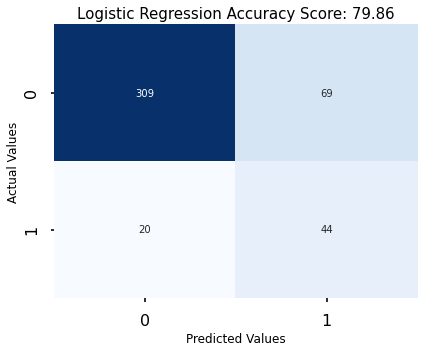

In [112]:
Log=LogisticRegression(penalty='l1',solver='liblinear',C=10,random_state=42)
Log.fit(X_st_train,y_train_st)
ylog_pred=Log.predict(X_st_test)
Accuracy_train = round(Log.score(X_st_train, y_train_st) * 100, 2)
print('The Logistic Regression accuracy of train is {}.'.format(Accuracy_train))
Accuracy_test = round(metrics.accuracy_score(y_test,ylog_pred) * 100, 2)
#print('The accuracy of test is {}.'.format(Accuracy_test))
confusion_matrix(y_test,ylog_pred)
print(classification_report(y_test,ylog_pred))
plt.subplots(figsize=(6,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,ylog_pred)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values',fontsize=12)
plt.xlabel('Predicted Values',fontsize=12)
plt.title('Logistic Regression Accuracy Score: {0}'.format(Accuracy_test, size = 20),fontsize=15)
plt.tight_layout()
plt.show()

Feature:0, Score: 0.96293
Feature:1, Score: -1.07457
Feature:2, Score: -4.32551
Feature:3, Score: -3.58900
Feature:4, Score: 2.42182
Feature:5, Score: -0.67631
Feature:6, Score: 2.64353
Feature:7, Score: -0.60178
Feature:8, Score: -0.02228
Feature:9, Score: 0.30516
Feature:10, Score: 4.37153
Feature:11, Score: 3.58808
Feature:12, Score: 1.50328
Feature:13, Score: -4.52241
Feature:14, Score: 3.35544
Feature:15, Score: 1.05359
Feature:16, Score: 0.30680
Feature:17, Score: 0.95056
Feature:18, Score: 0.61559
Feature:19, Score: 0.46762
Feature:20, Score: -1.71617
Feature:21, Score: -2.02890


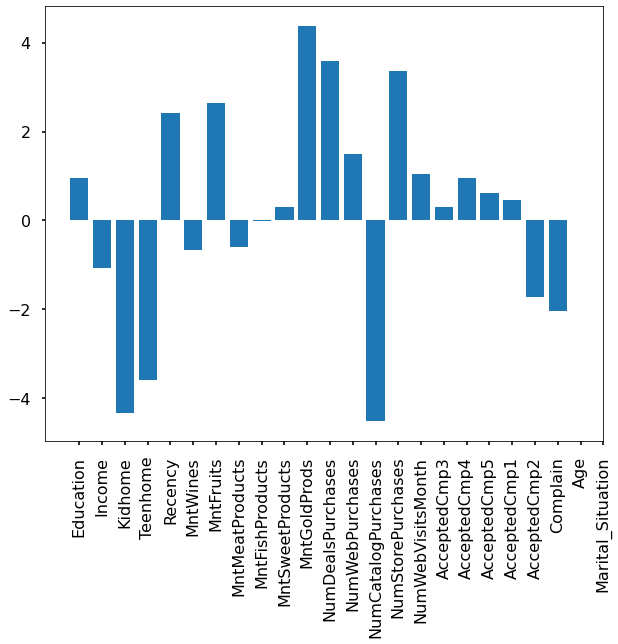

In [110]:
# get feature importance
importance = Log.coef_[0]
for i,v in enumerate(importance):
    print('Feature:%0d, Score: %.5f' % (i,v))
plt.subplots(figsize=(10,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['Education','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Age','Marital_Situation'],rotation=90)
plt.show()

#### SVM

In [91]:
SVM_base=SVC(random_state=42)
SVM_base.fit(X_st_train,y_train_st)
y_pred_SVM=Log_base.predict(X_st_test)
accuracy_train_SVM = round(SVM_base.score(X_st_train, y_train_st) * 100, 2)
print('The SVM accuracy of Train is {}.'.format(accuracy_train_SVM))
accuracy_test_SVM = round(metrics.accuracy_score(y_test,y_pred) * 100, 2)
print('The SVM accuracy of test is {}.'.format(accuracy_test_SVM))

The SVM accuracy of Train is 88.47.
The SVM accuracy of test is 79.41.


In [92]:
# define model and parameters
SVM_model = SVC()
kernel = ['poly', 'rbf', 'sigmoid','linear']
C = [0.01,0.1,1,10,100]
gamma = ['scale','auto']
# define grid search
grid_SVM = dict(kernel=kernel,C=C,gamma=gamma)
cv_SVM = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search_SVM = GridSearchCV(estimator=SVM_model, param_grid=grid_SVM, n_jobs=-1, cv=cv_SVM, scoring='accuracy',error_score=0)
grid_result_SVM = grid_search_SVM.fit(X_st_train, y_train_st)
# summarize results
print("Best: %f using %s" % (grid_result_SVM.best_score_, grid_result_SVM.best_params_))
means_SVM = grid_result_SVM.cv_results_['mean_test_score']
stds_SVM = grid_result_SVM.cv_results_['std_test_score']
params_SVM = grid_result_SVM.cv_results_['params']
for mean_SVM, stdev_SVM, param_SVM in zip(means_SVM, stds_SVM, params_SVM):
    print("%f (%f) with: %r" % (mean_SVM, stdev_SVM, param_SVM))

Best: 0.914205 using {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.760637 (0.021797) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}
0.738355 (0.018198) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}
0.762669 (0.019770) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.757171 (0.024665) with: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
0.572257 (0.065373) with: {'C': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
0.726980 (0.040961) with: {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}
0.648544 (0.123559) with: {'C': 0.01, 'gamma': 'auto', 'kernel': 'sigmoid'}
0.757171 (0.024665) with: {'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}
0.816533 (0.025079) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.806351 (0.024334) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.723484 (0.026508) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.820359 (0.025830) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.572257 (0.065373) with: {'C': 0.1, 'gam

In [1]:
SVM=SVC(kernel='rbf',gamma='scale',C=100,random_state=42)
SVM.fit(X_st_train,y_train_st)
y_SVM_pred=Log.predict(X_st_test)
Accuracy_train_SVM = round(SVM.score(X_st_train, y_train_st) * 100, 2)
print('The SVM accuracy of train is {}.'.format(Accuracy_train_SVM))
Accuracy_test_SVM = round(metrics.accuracy_score(y_test,y_SVM_pred) * 100, 2)
confusion_matrix(y_test,y_SVM_pred)
print(classification_report(y_test,y_SVM_pred))
plt.subplots(figsize=(6,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_SVM_pred)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values',fontsize=12)
plt.xlabel('Predicted Values',fontsize=12)
plt.title('The SVM Accuracy Score: {0}'.format(Accuracy_test_SVM, size = 20),fontsize=15)
plt.tight_layout()
plt.show()

NameError: name 'SVC' is not defined

Feature:0, Score: 0.45408
Feature:1, Score: -0.45332
Feature:2, Score: -1.93370
Feature:3, Score: -1.92745
Feature:4, Score: 1.39360
Feature:5, Score: -0.41721
Feature:6, Score: 0.94531
Feature:7, Score: -0.46130
Feature:8, Score: 0.08289
Feature:9, Score: 0.26571
Feature:10, Score: 1.44560
Feature:11, Score: 1.16589
Feature:12, Score: 0.84777
Feature:13, Score: -1.60385
Feature:14, Score: 1.17987
Feature:15, Score: 0.82537
Feature:16, Score: 0.20857
Feature:17, Score: 0.48583
Feature:18, Score: 0.27187
Feature:19, Score: 0.07753
Feature:20, Score: -0.30000
Feature:21, Score: -1.32698


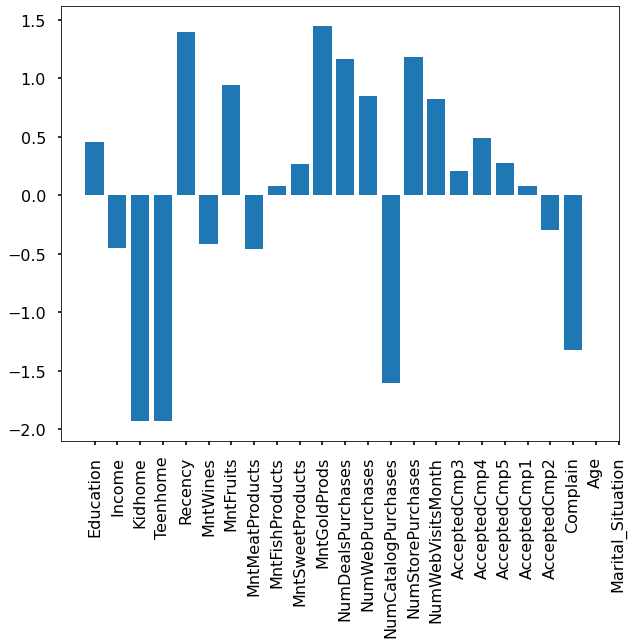

In [104]:
importance_SVM = SVM.coef_[0]
for i,v in enumerate(importance_SVM):
    print('Feature:%0d, Score: %.5f' % (i,v))
plt.subplots(figsize=(10,8))
plt.bar([x for x in range(len(importance_SVM))], importance_SVM)
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],['Education','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Age','Marital_Situation'],rotation=90)
plt.show()

### Result

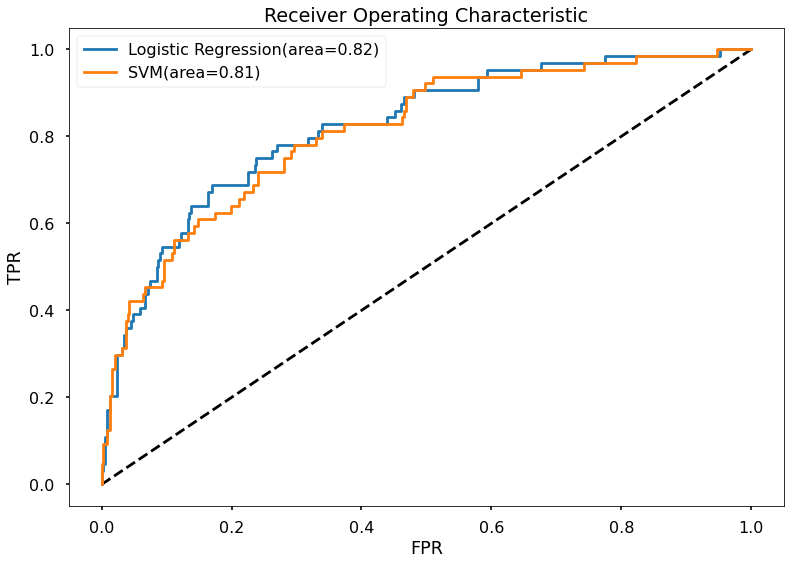

In [111]:
Logit_roc_auc = roc_auc_score(y_test, Log.predict_proba(X_st_test)[:,1])
fpLR,tpLR,thresholdsLR = roc_curve(y_test, Log.predict_proba(X_st_test)[:,1])
y_test_score = SVM.decision_function(X_st_test)
#SVM_roc_auc = roc_auc_score(y_test, SelectedSVMmodel.predict_proba(X_st_test)[:,1])
fpSVM,tpSVM,_= roc_curve(y_test, y_test_score)
SVM_roc_auc = auc(fpSVM,tpSVM)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpLR,tpLR,label='Logistic Regression(area=%0.2f)'% Logit_roc_auc)
plt.plot(fpSVM,tpSVM, label= 'SVM(area=%0.2f)'% SVM_roc_auc)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()